Atividade
    - Selecione um série temporal da atividade anterior
    - Varie cinco valores diferentes para p, d e q em um modelo ARIMA
       * Qual a melhor configuração de parâmetros de acordo com:
         MAE
         MSE
         RMSE
https://machinelearningmastery.com/time-series-forecasting/
https://machinelearningmastery.com/time-series-forecasting-performace-measures-with-python/
https://machinelearningmastery.com/arima-for-time-series-forcasting-with-python/

In [16]:
import pandas as pd
from pandas import Series 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline

In [17]:
dados  = Series.from_csv('CSVs/international-airline-passengers.csv', sep=';', header=0)

C:\Users\aluno.CAMPUS\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [18]:
values = dados.values
size = int(len(values) * 0.66)

In [19]:
train, test = values[0:size], values[size:len(values)]

In [20]:
history = [x for x in train]
predictions = list()

predicted=279.908359, expected=306.000000
predicted=346.953514, expected=315.000000
predicted=325.749793, expected=301.000000
predicted=305.826142, expected=356.000000
predicted=365.160648, expected=348.000000
predicted=330.488077, expected=355.000000
predicted=368.172536, expected=422.000000
predicted=417.317430, expected=465.000000
predicted=468.888424, expected=467.000000
predicted=462.688139, expected=404.000000
predicted=368.300063, expected=347.000000
predicted=340.324498, expected=305.000000
predicted=308.878340, expected=336.000000
predicted=383.349031, expected=340.000000
predicted=351.781329, expected=318.000000
predicted=322.739377, expected=362.000000
predicted=372.884409, expected=348.000000
predicted=333.332446, expected=363.000000
predicted=382.493429, expected=435.000000
predicted=435.787735, expected=491.000000
predicted=502.006285, expected=505.000000
predicted=497.701985, expected=404.000000
predicted=347.130147, expected=359.000000
predicted=364.777306, expected=310

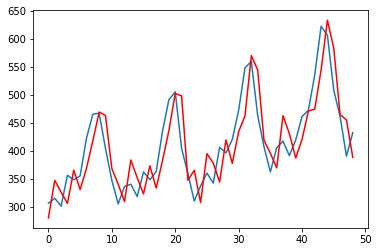

In [21]:
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' %error)
plt.plot(test)
plt.plot(predictions, color='red')